In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from tensorflow.keras.datasets import fashion_mnist


In [13]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
len(x_train)

60000

In [16]:
len(x_test)

10000

In [17]:
n=1234
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  42,  41,  52,  52,  58,  28,   0,  17,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

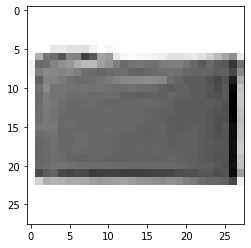

In [21]:
plt.imshow(x_train[n], cmap='Greys')

In [22]:
print('這是', class_names[y_train[n]])

這是 Bag


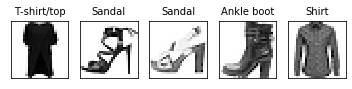

In [23]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  


In [24]:
x_train = x_train/255
x_test = x_test/255

<function ndarray.reshape>

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train = to_categorical(y_train, 10)

In [27]:
y_test = to_categorical(y_test, 10)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [31]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1784 - acc: 0.1075
Epoch 2/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1654 - acc: 0.1723
Epoch 3/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1699 - acc: 0.1502
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1301 - acc: 0.3484
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1266 - acc: 0.3662
Epoch 6/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1164 - acc: 0.4173
Epoch 7/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1118 - acc: 0.4401
Epoch 8/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1267 - acc: 0.3660
Epoch 9/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1201 - acc: 0.3988
Epoch 10/20
60000/60000 [==============================] - 

神經網路預測是: Bag


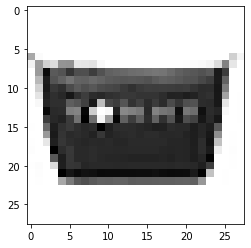

In [40]:
result = model.predict_classes(x_test)
n = 7407
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')